In [ ]:
# importing dependencies
import numpy as np
import pandas as pd

In [ ]:
#importing dataset
df = pd.read_csv("/content/spam.csv" ,encoding='latin-1')

Analysing the dataset


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3613,ham,Ok c Ì_ then.,NaN,NaN,NaN
2676,ham,* Am on a train back from northampton so i'm a...,NaN,NaN,NaN
5069,spam,5p 4 alfie Moon's Children in need song on ur ...,NaN,NaN,NaN
1255,ham,Just wait till end of march when el nino gets ...,NaN,NaN,NaN
1478,ham,I think its far more than that but find out. C...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

Preprocessing the dataset

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.rename(columns={'v1':'target','v2':'label'},inplace=True)

In [ ]:
df.head()

,target,label
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['target']=le.fit_transform(df['target'])

In [ ]:
df.head()

,target,label
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
label     0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.head()

,target,label
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

Performing EDA


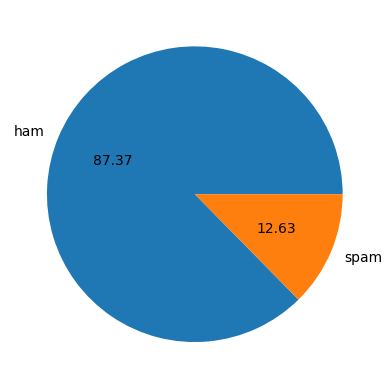

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
df.sample()

,target,label
4837,0,All boys made fun of me today. Ok i have no pr...


In [ ]:
df['num_char']=df['label'].apply(len)

<ipython-input-43-ee80daa4c9dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['label'].apply(len)


In [ ]:
df.head()

,target,label,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_word']=df['label'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-51-33e2f65404ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word']=df['label'].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
df['num_sent']=df['label'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-52-7ff77fd5e592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['label'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [ ]:
df.head()

,target,label,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
import seaborn as sns

<ipython-input-63-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

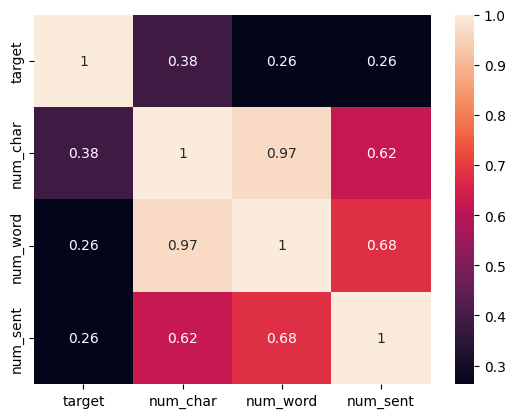

In [ ]:
sns.heatmap(df.corr(),annot=True)

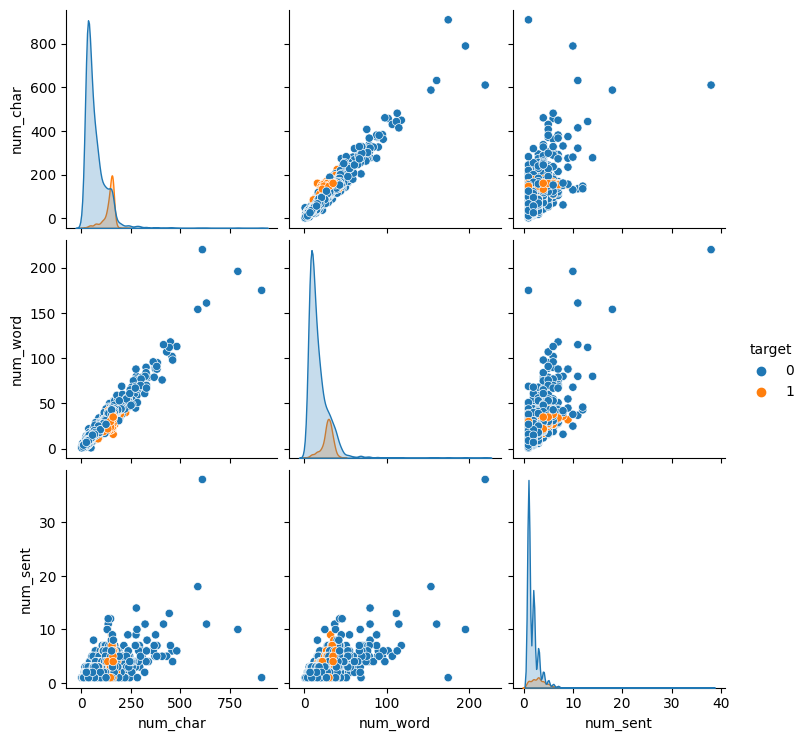

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Feature processing

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
transform("HELLO My name is abhijeet playing dancing")

'hello name abhijeet play danc'

In [ ]:
df['transformed_text'] = df['label'].apply(transform)

<ipython-input-106-836a20132226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['label'].apply(transform)


In [ ]:
df.head()

,target,label,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
from collections import Counter

In [ ]:
Counter(spam_corpus).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv= CountVectorizer()
tf= TfidfVectorizer()
x = tf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
print(x_test.shape)

(517, 6708)


Model Testing

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb= GaussianNB()
mul = MultinomialNB()
ber= BernoulliNB()



In [ ]:
gnb.fit(x_train,y_train)
prediction1= gnb.predict(x_test)

print(accuracy_score(y_test,prediction1))
print(confusion_matrix(y_test,prediction1))
print(precision_score(y_test,prediction1))

0.8684719535783365
[[404  59]
 [  9  45]]
0.4326923076923077


In [ ]:
mul.fit(x_train,y_train)
prediction2= mul.predict(x_test)

print(accuracy_score(y_test,prediction2))
print(confusion_matrix(y_test,prediction2))
print(precision_score(y_test,prediction2))

0.9709864603481625
[[463   0]
 [ 15  39]]
1.0


In [151]:
ber.fit(x_train,y_train)
prediction3= ber.predict(x_test)

print(accuracy_score(y_test,prediction3))
print(confusion_matrix(y_test,prediction3))
print(precision_score(y_test,prediction3))

0.9825918762088974
[[463   0]
 [  9  45]]
1.0


In [157]:
def prediction (text):
  text = transform(text)
  text = tf.transform([text])

  prediction = ber.predict(text)

  return prediction[0]

In [159]:
prediction("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

1

In [160]:
import pickle

pickle.dump(tf,open("tfidf.pkl","wb"))
pickle.dump(ber,open("model.pkl","wb"))